In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [5]:
# Display sample data
df.head()

,AGG,SPY
,close,close
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


In [6]:
# Calculate the daily roi for the stocks
# Display sample data
daily_returns = df.pct_change().dropna()
daily_returns.head()

,AGG,SPY
,close,close
2019-01-03 00:00:00-05:00,0.004081,-0.021730
2019-01-04 00:00:00-05:00,-0.003037,0.032521
2019-01-07 00:00:00-05:00,-0.002109,0.007884
2019-01-08 00:00:00-05:00,-0.000470,0.008844
2019-01-09 00:00:00-05:00,0.000564,0.004130


In [7]:
# Compute daily volatility
daily_volatility = daily_returns.std()
agg_volatility = daily_volatility["AGG"]["close"]
spy_volatility = daily_volatility["SPY"]["close"]

In [8]:
# Save the last day's closing price
agg_last_price = df["AGG"]["close"][-1]
spy_last_price = df["SPY"]["close"][-1]

In [9]:
# Setup the Monte Carlo Parameters for 30 years
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()

In [10]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    #print progess of the simulations 
    print(f"Returning Simulation {x+1}/500...")
    
    # Create the initial simulated prices array seeded with the last closing price
    agg = [agg_last_price]
    spy = [spy_last_price]
    
    # Simulate the returns 
    for i in range(number_records):
        agg.append(agg[-1] * (1 + np.random.normal(daily_returns.mean()["AGG"]["close"], agg_volatility)))
        spy.append(spy[-1] * (1 + np.random.normal(daily_returns.mean()["SPY"]["close"], spy_volatility)))

    portfolio = pd.DataFrame({"AGG Simulated Prices": agg, "SPY Simulated Prices": spy})

    portfolio_returns=portfolio.pct_change()
    
    # Set the Portfolio Weights 60% SPY and 40% AGG
    spy_weight = 0.60
    agg_weight = 0.40
    
    
    # Calculate the weighted portfolio return
    portfolio_returns = spy_weight * portfolio_returns["SPY Simulated Prices"] + agg_weight * portfolio_returns["AGG Simulated Prices"]
    
    # Calculate the normalized, cumulative return series
    monte_carlo[x] = (1 + portfolio_returns.fillna(0)).cumprod()

Returning Simulation 1/500...
Returning Simulation 2/500...
Returning Simulation 3/500...
Returning Simulation 4/500...
Returning Simulation 5/500...
Returning Simulation 6/500...
Returning Simulation 7/500...
Returning Simulation 8/500...
Returning Simulation 9/500...
Returning Simulation 10/500...
Returning Simulation 11/500...
Returning Simulation 12/500...
Returning Simulation 13/500...
Returning Simulation 14/500...
Returning Simulation 15/500...
Returning Simulation 16/500...
Returning Simulation 17/500...
Returning Simulation 18/500...
Returning Simulation 19/500...
Returning Simulation 20/500...
Returning Simulation 21/500...
Returning Simulation 22/500...
Returning Simulation 23/500...
Returning Simulation 24/500...
Returning Simulation 25/500...
Returning Simulation 26/500...
Returning Simulation 27/500...
Returning Simulation 28/500...
Returning Simulation 29/500...
Returning Simulation 30/500...
Returning Simulation 31/500...
Returning Simulation 32/500...
Returning Simulat

Returning Simulation 261/500...
Returning Simulation 262/500...
Returning Simulation 263/500...
Returning Simulation 264/500...
Returning Simulation 265/500...
Returning Simulation 266/500...
Returning Simulation 267/500...
Returning Simulation 268/500...
Returning Simulation 269/500...
Returning Simulation 270/500...
Returning Simulation 271/500...
Returning Simulation 272/500...
Returning Simulation 273/500...
Returning Simulation 274/500...
Returning Simulation 275/500...
Returning Simulation 276/500...
Returning Simulation 277/500...
Returning Simulation 278/500...
Returning Simulation 279/500...
Returning Simulation 280/500...
Returning Simulation 281/500...
Returning Simulation 282/500...
Returning Simulation 283/500...
Returning Simulation 284/500...
Returning Simulation 285/500...
Returning Simulation 286/500...
Returning Simulation 287/500...
Returning Simulation 288/500...
Returning Simulation 289/500...
Returning Simulation 290/500...
Returning Simulation 291/500...
Returnin

In [11]:
# Check that the simulation ran successfully
monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000476,1.000536,0.998808,1.005394,1.011797,0.994452,0.997251,1.013277,1.000869,0.995376,...,1.002066,0.992709,1.001801,1.002671,0.996472,1.003160,1.001638,1.006800,0.998173,0.994765
2,1.008876,1.004699,1.003590,0.996711,1.009571,0.994247,0.994214,1.007199,1.000225,0.993036,...,1.005759,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005408,0.996137,0.998871
3,1.008286,1.004228,1.003770,0.998232,1.007751,0.987669,0.998229,1.001361,1.000230,1.001279,...,1.006771,0.988444,1.004118,1.010565,0.993293,0.994454,1.008272,0.999144,0.998656,1.003328
4,1.013963,1.006575,1.008493,1.002636,1.013664,0.990972,1.003241,0.995491,1.002048,1.006036,...,1.004196,0.992123,1.004724,1.004423,0.994844,0.993782,1.005722,1.002248,0.996964,1.004095


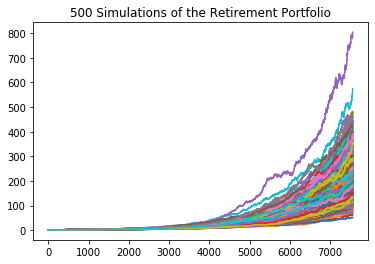

In [12]:
# Visualize the Simulation
monte_carlo.plot(legend=None, title=f"{x+1} Simulations of the Retirement Portfolio")

In [13]:
#On the starter file, the code that was given for "number_records" was for 30 years. This portion is asking for cumulative 
# of 20 years so I'm guessing there has been a typo. I'm doing cumulative return for 30 years here
ending_returns = monte_carlo.iloc[-1, :]

In [14]:
#Print final return of each simulations
ending_returns = monte_carlo.tail(1).T
ending_returns.head()

,7560
0,192.773859
1,171.964137
2,177.998514
3,138.466715
4,175.628015


In [15]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_returns.quantile(q=[0.05, 0.95])
confidence_interval

,7560
0.05,102.825606
0.95,379.341808


<Figure size 432x288 with 0 Axes>

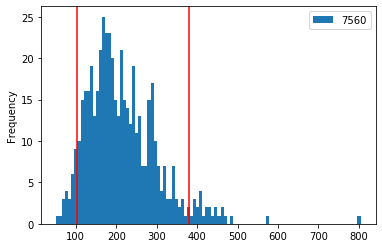

In [16]:
# Visualize the distribution of the ending returns
plt.figure();
ending_returns.plot(kind= 'hist', bins=100)
plt.axvline(confidence_interval.iloc[0,0], color="r")
plt.axvline(confidence_interval.iloc[1,0], color="r")

In [17]:
ending_returns.quantile([.01, .5, .9])

,7560
0.01,75.315656
0.50,199.083857
0.90,320.561549


In [18]:
initial_investment = 20000

# Compute expected portfolio return
initial_investment * ending_returns.quantile([.01, .5, .9])

,7560
0.01,1.506313e+06
0.50,3.981677e+06
0.90,6.411231e+06


In [19]:
# Set Plaid's projected income
plaid_projected_annual_income =  7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = .04 * (initial_investment * ending_returns.quantile(.1)).iloc[0]

# Determine if the retirement income meets or exceeds the current projected income
if retirement_income >= plaid_projected_annual_income:
    print(f"Your retirement income of ${retirement_income:} meets the current projected income.")
else:
    print(f"Your retirement income of ${retirement_income:} does not meet the current projected income.")

Your retirement income of $95221.98792115363 meets the current projected income.


In [20]:
increased_investment= .04 * (1.5 * initial_investment * ending_returns.quantile(.1)).iloc[0]

print(f"You will have retirement income of ${increased_investment:} with 50% increase in the initial investement with the current projected income.")

You will have retirement income of $142832.98188173046 with 50% increase in the initial investement with the current projected income.
